In [238]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors={'urban':'lightcoral','suburban':'lightskyblue','rural':'gold'}
# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data =pd.read_csv(city_data_to_load)
ride_data =pd.read_csv(ride_data_to_load)

city_df = pd.DataFrame(city_data)
ride_df = pd.DataFrame(ride_data)

# Combine the data into a single dataset
combo_df =pd.merge(city_df, ride_df, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

# Display the data table for preview
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


## Bubble Plot of Ride Sharing Data

In [239]:
#aggregate rides and average of fares
def summary(x):
    fields ={'Average Fare':x['fare'].mean(),
            'Total Rides': x['ride_id'].count(),
            'Number of Drivers': x['driver_count'].mean()}
    
    return pd.Series(fields)

combo_grouped_df = combo_df.groupby(['city','type']) #groupby city and type.  
summary_df =combo_grouped_df.apply(summary).reset_index(level='type') #create new df and reset index by pulling 'type' out of the index
summary_df.head()

,type,Average Fare,Total Rides,Number of Drivers
city,,,,
Amandaburgh,Urban,24.641667,18.0,12.0
Barajasview,Urban,25.332273,22.0,26.0
Barronchester,Suburban,36.422500,16.0,11.0
Bethanyland,Suburban,32.956111,18.0,22.0
Bradshawfurt,Rural,40.064000,10.0,7.0


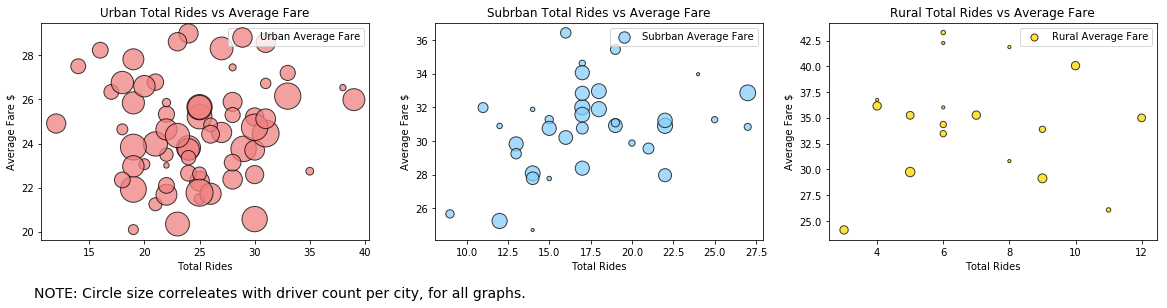

In [240]:
# Obtain the x and y coordinates for each of the three city types
# x_axis = summary_df['Total Rides']
# y_axis = summary_df['Average Fare']

urban_df=summary_df.loc[summary_df['type'] == 'Urban'] #get only the urban rows
suburban_df=summary_df.loc[summary_df['type'] == 'Suburban'] #get only the suburban rows
rural_df=summary_df.loc[summary_df['type'] == 'Rural']#get only hte rural rows

#Get X and Y axis for each type
urban_x_axis = urban_df['Total Rides'] 
urban_y_axis = urban_df['Average Fare']

suburban_x_axis = suburban_df['Total Rides']
suburban_y_axis = suburban_df['Average Fare']

rural_x_axis = rural_df['Total Rides']
rural_y_axis = rural_df['Average Fare']

#Build the scatter plots for each city types
fig=plt.figure(figsize = (20,4)) #creates a figure

#creates 3 subplots within figure
ax1=fig.add_subplot(1,3,1)  #(1,3,1) means (rows, columns, plot #)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

#create 3 plots and add chart info
ax1.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors=colors['urban'], edgecolors="black",
            s=urban_df['Number of Drivers']*10, alpha=0.75)
ax1.title.set_text("Urban Total Rides vs Average Fare")
ax1.set_xlabel("Total Rides")
ax1.set_ylabel("Average Fare $")
ax1.legend(['Urban Average Fare'],loc ='best')#loc best does not seem to be working.  Uknown reason.
ax1.text(10, 17, 'NOTE: Circle size correleates with driver count per city, for all graphs.', fontsize=14)

ax2.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors=colors['suburban'], edgecolors="black",
            s=suburban_df['Number of Drivers']*10, alpha=0.75)
ax2.title.set_text("Subrban Total Rides vs Average Fare")
ax2.set_xlabel("Total Rides")
ax2.set_ylabel("Average Fare $")
ax2.legend(['Subrban Average Fare'],loc ="best")#loc best does not seem to be working.  Uknown reason.


ax3.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors=colors['rural'], edgecolors="black",
            s=rural_df['Number of Drivers']*10, alpha=0.75)
ax3.title.set_text("Rural Total Rides vs Average Fare")
ax3.set_xlabel("Total Rides")
ax3.set_ylabel("Average Fare $")
ax3.legend(['Rural Average Fare'], loc='best')#loc best does not seem to be working.  Uknown reason.

plt.savefig("Images/type_sep.png")# saves figure to separate file
plt.show()

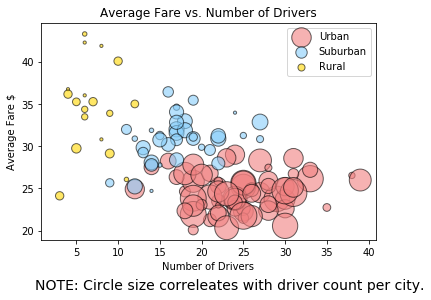

In [241]:
#Build a combined bubble plot

fig = plt.figure()#creates figure
ax= fig.add_subplot(1,1,1) #creates subplot

#add 3 sets of data
ax.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors=colors['urban'], edgecolors="black",
            s=urban_df['Number of Drivers']*10, alpha=.6, label ='Urban',linewidths=None)

ax.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors=colors['suburban'], edgecolors="black",
            s=suburban_df['Number of Drivers']*10, alpha=.6,label='Suburban',linewidths=None)

ax.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors=colors['rural'], edgecolors='black', #black looks best for edgecolors
             s=rural_df['Number of Drivers']*10, alpha=.6, label ='Rural',linewidths=None)
#add chart info
ax.set_title('Average Fare vs. Number of Drivers')
ax.set_xlabel('Number of Drivers')
ax.set_ylabel('Average Fare $')
ax.legend(loc='best')
ax.text(0, 13, 'NOTE: Circle size correleates with driver count per city.', fontsize=14)

plt.savefig("Images/all_types.png")#save figure
plt.show()


In [242]:
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


In [243]:
#df for pie charts 
def pie(x):
    fields ={'Sum of Fare':x['fare'].sum(),
            'Total Rides': x['ride_id'].count(),
            'Average Fare': x['fare'].sum()/x['ride_id'].count()}
    
    return pd.Series(fields)

pie_df = combo_df.groupby(['type']).apply(pie).reset_index()
pie_df


,type,Sum of Fare,Total Rides,Average Fare
0,Rural,4327.93,125.0,34.623440
1,Suburban,19356.33,625.0,30.970128
2,Urban,39854.38,1625.0,24.525772


In [244]:
# #troubleshooting and help chart
# new_df=combo_df.groupby('type') #group the merged df by type
# fare_sum=new_df['fare'].sum().reset_index() #sum fares and reset index so you can use 'type' as a field.

# plt.pie(fare_sum['fare'], labels=fare_sum['type']) #create a pie chart using sum of 'fare' and labels from 'type'
# plt.show()

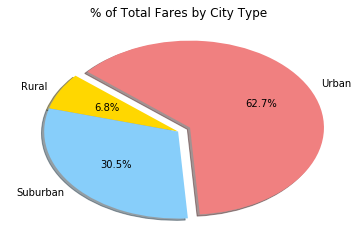

In [245]:
explode=(0,0,.1)#explode out Rural to make more legible

#pie chart of Total Fares
plt.pie(pie_df['Sum of Fare'], explode =explode, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=.6)

plt.title('% of Total Fares by City Type')
plt.savefig("Images/pie_fares.png")
plt.show()

## Total Rides by City Type

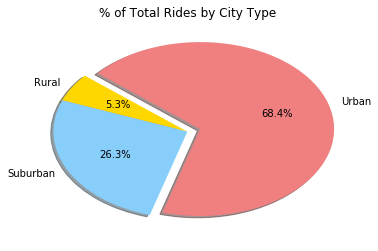

In [246]:
explode2=(0,0,.1)
#pie chart of percent of rides
plt.pie(pie_df['Total Rides'], explode =explode2, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')
plt.savefig("Images/pie_rides.png")
plt.show()


In [247]:
#intermendiate df for pie charts
def pie2(x):
    fields ={'Sum of Fare':x['fare'].sum(),
            'Total Rides': x['ride_id'].count()}
    
    return pd.Series(fields)

pie_df2=combo_df.groupby(['city','driver_count','type']).apply(pie2).reset_index()

#final df for pie charts
def pie3(x):
    fields ={'Sum of Fare':x['Sum of Fare'].sum(),
            'Total Rides': x['Total Rides'].sum(),
            'Total Drivers':x['driver_count'].sum(),
            'Sum Fare/Driver':x['Sum of Fare'].sum()/x['driver_count'].sum(),
            'Sum Fare/Ride':x['Sum of Fare'].sum()/x['Total Rides'].sum(),
            'Total Rides/ Number of Drivers': x['Total Rides'].sum()/x['driver_count'].sum()}
    
    return pd.Series(fields)

pie_df3= pie_df2.groupby(['type']).apply(pie3).reset_index()
pie_df3.head()

,type,Sum of Fare,Total Rides,Total Drivers,Sum Fare/Driver,Sum Fare/Ride,Total Rides/ Number of Drivers
0,Rural,4327.93,125.0,78.0,55.486282,34.623440,1.602564
1,Suburban,19356.33,625.0,490.0,39.502714,30.970128,1.275510
2,Urban,39854.38,1625.0,2405.0,16.571468,24.525772,0.675676


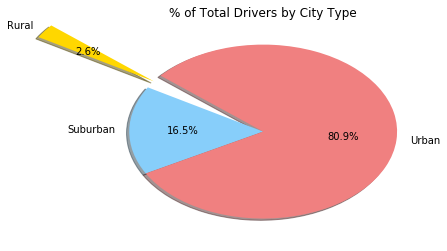

In [248]:
explode=(1,0,0)#explode out Rural to make more legible

#pie chart of Percent of Drivers
plt.pie(pie_df3['Total Drivers'], explode =explode, labels=pie_df3['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=.6)

plt.title('% of Total Drivers by City Type')
plt.savefig("Images/pie_drivers.png")
plt.show()

## 3 Observabfle Trends
### Observation 1: There is a negative correlation between Total Rides and Average Fare.

As the number of rides increase the average fare decreases.  Rural areas have few rides and have the highest average fare at  34.62/ride. Urban areas have the most rides and have the lowest average fare at 16.51/ride. Suburban areas have fewer drivers than Urban areas and more drivers than rural areas. The average fare falls between Urban and Rual at 30.97/ride. This suggests drivers wishing to maximize money per ride should focus on rural areas.    

### Observation 2: There is a positive correlation between Total Rides and Total Drivers

Rural areas have the fewest drivers and riders. Suburban areas have the middle number of drivers and riders. Urban areas have the most drivers and riders. 

### Observatoin 3: Suburban drivers have twice the available rides per driver as urban drivers. Rural drivers have almost 3X the number of rides available per driver. 

This suggests that while Urban areas have more riders, the number of drivers make it less profitable for a driver. Intuition would suggest driving in Urban areas where the most riders are. However, driving in a rural area may be more efficient. There are fewer riders but there are also much fewer drivers. This provides a favorable ratio of drivers to riders and results in more earnings per driver. 

### Observation 4: This dataset could be expaned. 
This dataset provides limited insight into the ride share model. Suggested data to collect is the following:
-  Time online per driver
-  Distance Traveled during Fare
-  Distance to Rider
-  Vehicle type
-  Driver Rating
-  Driver ammenities
-  Fare times





